In [0]:
# Użycie zapisanych na dysku zdjęć.
!unzip -q '/content/drive/My Drive/train_val_test.zip' -d '/content'

In [20]:
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(2)

import os
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from sklearn.metrics import classification_report

batch_size = 128 # było 128
epochs = 20
IMG_HEIGHT, IMG_WIDTH, channels = 220, 220, 3

dir = '/content/'
dir_path = os.path.join(dir, 'train_val_test')

train_gen = ImageDataGenerator(rescale=1.0/255.) # rescale=1.0/255., dtype='uint8'
val_gen = ImageDataGenerator(rescale=1.0/255.)
test_gen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_gen.flow_from_directory(
    dir_path + '/train',
    batch_size=batch_size,
    shuffle=True,
    color_mode="rgb",
    class_mode='categorical',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    seed=2)
validation_generator = val_gen.flow_from_directory(
    dir_path + '/val',
    batch_size=batch_size,
    shuffle=True,
    color_mode="rgb",
    class_mode='categorical',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    seed=2)
test_generator = test_gen.flow_from_directory(
    dir_path + '/test',
    batch_size=1,
    shuffle=False,
    color_mode="rgb",
    class_mode='categorical',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    seed=2)

STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n // validation_generator.batch_size

Found 26501 images belonging to 5 classes.
Found 2000 images belonging to 5 classes.
Found 2000 images belonging to 5 classes.


In [0]:
# Użycie zapisanego na dysku modelu.
model = tf.keras.models.load_model('/content/drive/My Drive/model.h5')

In [11]:
# Tworzenie modelu. Jeśli model jest wczytywany to nie tworzyć bo to go usunie.
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation="relu", 
                 input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), 
                 data_format="channels_last"))
model.add(Conv2D(32, kernel_size=5, activation="relu"))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, kernel_size=3, activation="relu"))
model.add(Conv2D(8, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, kernel_size=3, activation="relu"))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(5, activation="softmax"))

model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001, 
                                                   beta_1=0.9, beta_2=0.999, 
                                                   epsilon=1e-07), 
              loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 218, 218, 32)      896       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 214, 214, 32)      25632     
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 212, 212, 32)      9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 106, 106, 32)      0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 104, 104, 32)      9248      
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 102, 102, 32)      9248      
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 100, 100, 16)     

In [21]:
history = model.fit(train_generator, 
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=epochs, shuffle=True,
                    use_multiprocessing=False, verbose=1) # verbose=2 <- bez wskaznika postępu, use_multiprocessing=False <- bardzo spowalnia ale nie ma błęw ani ostrzeżeń

Epoch 1/20
207/207 [==============================] - 161s 780ms/step - loss: 0.1988 - accuracy: 0.9313 - val_loss: 0.3449 - val_accuracy: 0.8854
Epoch 2/20
207/207 [==============================] - 163s 786ms/step - loss: 0.2065 - accuracy: 0.9285 - val_loss: 0.3985 - val_accuracy: 0.8687
Epoch 3/20
207/207 [==============================] - 163s 788ms/step - loss: 0.2023 - accuracy: 0.9286 - val_loss: 0.3731 - val_accuracy: 0.8797
Epoch 4/20
207/207 [==============================] - 163s 787ms/step - loss: 0.2028 - accuracy: 0.9303 - val_loss: 0.3310 - val_accuracy: 0.8901
Epoch 5/20
207/207 [==============================] - 163s 787ms/step - loss: 0.1981 - accuracy: 0.9320 - val_loss: 0.3809 - val_accuracy: 0.8750
Epoch 6/20
207/207 [==============================] - 163s 787ms/step - loss: 0.1978 - accuracy: 0.9318 - val_loss: 0.3404 - val_accuracy: 0.8839
Epoch 7/20
207/207 [==============================] - 163s 786ms/step - loss: 0.1948 - accuracy: 0.9327 - val_loss: 0.3465 -

2000/2000 [==============================] - 10s 5ms/step - loss: 0.3006 - accuracy: 0.9010
loss =  0.3006032407283783
accuracy =  0.9010000228881836
2000/2000 [==============================] - 8s 4ms/step
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       379
           1       0.94      0.79      0.86       477
           2       0.99      0.98      0.99       403
           3       0.74      0.97      0.84       303
           4       0.94      0.86      0.90       438

    accuracy                           0.90      2000
   macro avg       0.90      0.91      0.90      2000
weighted avg       0.91      0.90      0.90      2000



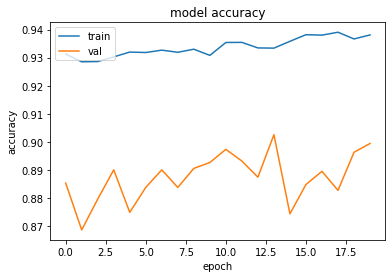

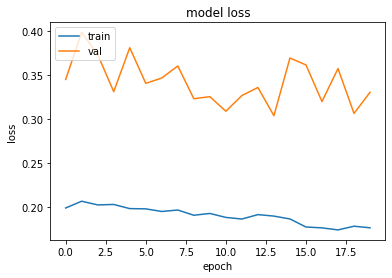

In [22]:
# Sprawdzenie poprawności na danych testowych
test_generator.reset()
STEP_SIZE_TEST = test_generator.n // test_generator.batch_size 
scores = model.evaluate(test_generator, 
                        steps=STEP_SIZE_TEST,
                        verbose=1)
print(model.metrics_names[0] + " = ", scores[0])
print(model.metrics_names[1] + " = ", scores[1])

test_generator.reset()
probabilities = model.predict(test_generator, 
                              steps=STEP_SIZE_TEST,
                              verbose=1)
y_test = probabilities.argmax(axis=1)
y_pred = test_generator.classes
print(classification_report(y_test, y_pred))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
# Zapisanie modelu
model.save('/content/drive/My Drive/model.h5')

In [24]:
# Zapisanie pliku .csv porównując typ i predykcję, jest podane zdjęcie więc łatwo będzie sprawdzić co z nim nie tak
test_generator.reset()
probabilities = model.predict(test_generator, 
                              steps=STEP_SIZE_TEST,
                              verbose=1)
predicted_class_indices = np.argmax(probabilities, axis=1)
labels = (train_generator.class_indices)
labels = dict((v, k) for k, v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

filenames = test_generator.filenames
results=pd.DataFrame({"Filename": filenames,
                      "Predictions": predictions,})
results.to_csv("results.csv", sep=';', index=False)

2000/2000 [==============================] - 8s 4ms/step
